# `PCAfold`: Python software to generate, analyze and improve PCA-derived low-dimensional manifolds

#### Authors: **Kamila Zdybał**, **Elizabeth Armstrong**, **Alessandro Parente**, **James C. Sutherland**

*Université Libre de Bruxelles*, *The University of Utah*, 2020


This Jupyter notebook contains code presented within the original software publication.

***

## Sample code snippets

Code presented in section *2.2 Software functionalities and sample code snippets*.

#### Data sampling

In [1]:
from PCAfold import DataSampler
import numpy as np

# Generate a dummy data set:
X = np.random.rand(1000,3)

# Generate a dummy vector of cluster classifications:
idx = np.zeros((1000,))
idx[500:800] = 1

# Instantiate DataSampler class object:
selection = DataSampler(idx, idx_test=[], random_seed=100, verbose=True)

# (1) Select equal number of samples from each cluster:
(idx_train, idx_test) = selection.number(20, test_selection_option=1)

# (2) Select equal percentage of samples from each cluster:
(idx_train, idx_test) = selection.percentage(20, test_selection_option=1)

# (3) Select samples manually from each cluster:
(idx_train, idx_test) = selection.manual({0:200, 1:100},
sampling_type='number', test_selection_option=1)

# (4) Select samples at random from each cluster:
(idx_train, idx_test) = selection.random(20, test_selection_option=1)

# Partition the original observations into train and test data:
X_train = X[idx_train,:]
X_test = X[idx_test,:]

Cluster 0: taking 100 train samples out of 700 observations (14.3%).
Cluster 1: taking 100 train samples out of 300 observations (33.3%).

Cluster 0: taking 600 test samples out of 600 remaining observations (100.0%).
Cluster 1: taking 200 test samples out of 200 remaining observations (100.0%).

Selected 200 train samples (20.0%) and 800 test samples (80.0%).

Cluster 0: taking 140 train samples out of 700 observations (20.0%).
Cluster 1: taking 60 train samples out of 300 observations (20.0%).

Cluster 0: taking 560 test samples out of 560 remaining observations (100.0%).
Cluster 1: taking 240 test samples out of 240 remaining observations (100.0%).

Selected 200 train samples (20.0%) and 800 test samples (80.0%).

Cluster 0: taking 200 train samples out of 700 observations (28.6%).
Cluster 1: taking 100 train samples out of 300 observations (33.3%).

Cluster 0: taking 500 test samples out of 500 remaining observations (100.0%).
Cluster 1: taking 200 test samples out of 200 remaining

#### Principal Component Analysis (PCA)

In [2]:
from PCAfold import PCA
import numpy as np

# Generate a dummy data set:
X = np.random.rand(100,10)

# Instantiate PCA class object:
pca_X = PCA(X, scaling='auto', n_components=2)

# Eigenvectors:
eigenvectors = pca_X.A

# Eigenvalues:
eigenvalues = pca_X.L

# Principal Components:
principal_components = pca_X.transform(X)

# Reconstruct the data set from the first two Principal Components:
X_rec = pca_X.reconstruct(principal_components)

***

## Illustrative example

Code presented in section *3. Illustrative example*.

In [3]:
import numpy as np

# Original variables:
X = np.genfromtxt('docs/tutorials/data-state-space.csv', delimiter=',')

# List of names of the original variables:
variables_names = ['$T$', '$H_2$', '$O_2$', '$O$', '$OH$', '$H_2O$', '$H$', '$HO_2$', '$CO$', '$CO_2$', '$HCO$']

# Corresponding source terms of the original variables:
S_X = np.genfromtxt('docs/tutorials/data-state-space-sources.csv', delimiter=',')

In [4]:
from PCAfold import preprocess
from PCAfold import reduction
from PCAfold import analysis

# Perform PCA on the data set:
pca_X = reduction.PCA(X, scaling='auto', n_components=2)

# Transform original variables to the PC space:
Z = pca_X.transform(X, nocenter=False)

# Transform sources of the original variables to the PC space:
S_Z = pca_X.transform(S_X, nocenter=True)

# Cluster the data set:
idx = preprocess.zero_neighborhood_bins(S_Z[:,0], k=4, zero_offset_percentage=2, split_at_zero=True, verbose=True)

# Compute populations of each cluster:
populations = preprocess.get_populations(idx)

Border values for bins:
[-87229.83051401  -2287.56587856      0.           2287.56587856
  27148.46341416]

Bounds for cluster 0:
	-87229.8305, -2288.0867
Bounds for cluster 1:
	-2286.3687, -0.0
Bounds for cluster 2:
	0.0, 2286.6953
Bounds for cluster 3:
	2288.3, 27148.4634


In [5]:
# Instantiate DataSampler class object:
sample = preprocess.DataSampler(idx, idx_test=[], random_seed=100, verbose=True)

# Select 2400 samples from each cluster:
(idx_manual, _) = sample.manual({0:2400, 1:2400, 2:2400, 3:2400}, sampling_type='number', test_selection_option=1)

Cluster 0: taking 2400 train samples out of 4335 observations (55.4%).
Cluster 1: taking 2400 train samples out of 16086 observations (14.9%).
Cluster 2: taking 2400 train samples out of 27163 observations (8.8%).
Cluster 3: taking 2400 train samples out of 2416 observations (99.3%).

Cluster 0: taking 1935 test samples out of 1935 remaining observations (100.0%).
Cluster 1: taking 13686 test samples out of 13686 remaining observations (100.0%).
Cluster 2: taking 24763 test samples out of 24763 remaining observations (100.0%).
Cluster 3: taking 16 test samples out of 16 remaining observations (100.0%).

Selected 9600 train samples (19.2%) and 40400 test samples (80.8%).



In [6]:
# Perform PCA on a sampled data set according to biasing option 2:
(eigenvalues, eigenvectors, Z_r, S_Z_r, C, D, C_r, D_r) = reduction.pca_on_sampled_data_set(X, idx_manual, scaling='auto', n_components=2, biasing_option=2, X_source=S_X)

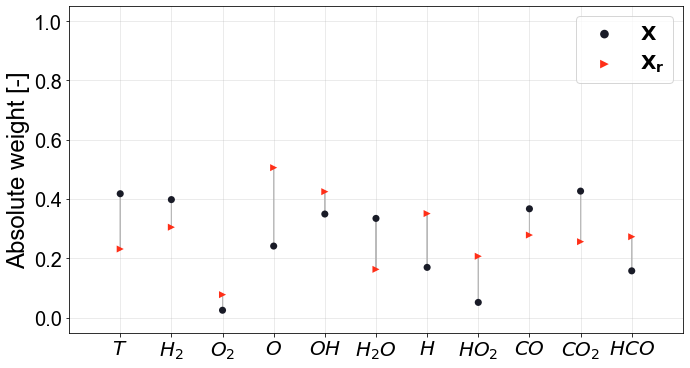

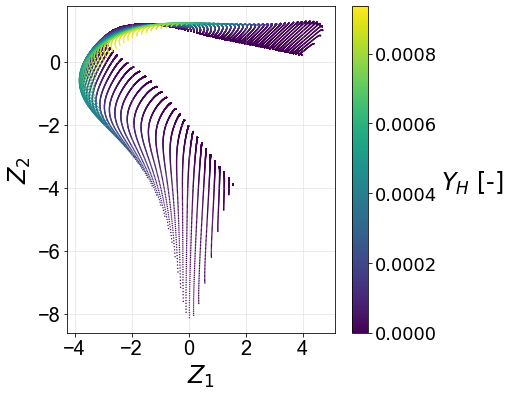

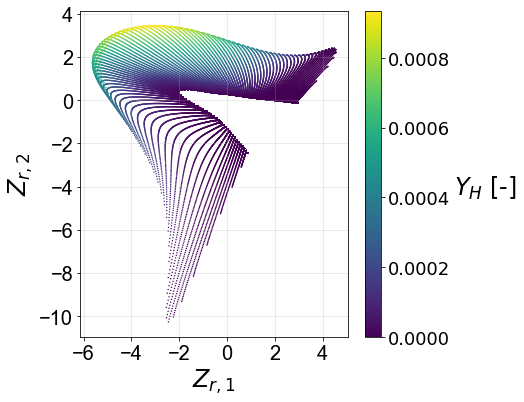

In [7]:
# Plot the weights change on the first eigenvector:
plt = reduction.analyze_eigenvector_weights_change(np.vstack((pca_X.A[:,0], eigenvectors[:,0])).T, variables_names, legend_label=['$\mathbf{X}$', '$\mathbf{X_r}$'], save_filename=None)

# Plot the initial two-dimensional manifold:
plt = reduction.plot_2d_manifold(Z[:,0], Z[:,1], color_variable=X[:,6], x_label='$Z_{1}$', y_label='$Z_{2}$', colorbar_label='$Y_H$ [-]', save_filename=None)

# Plot the biased two-dimensional manifold:
plt = reduction.plot_2d_manifold(Z_r[:,0], Z_r[:,1], color_variable=X[:,6], x_label='$Z_{r, 1}$', y_label='$Z_{r, 2}$', colorbar_label='$Y_H$ [-]', save_filename=None)

In [8]:
# Bandwidth values:
bandwidth_values = np.logspace(-3.5, 0.5, 25)

# Create dependent variables matrices:
depvars_initial = np.hstack((S_Z, X[:,[6]]))
depvars_biased = np.hstack((S_Z_r, X[:,[6]]))

# Create names for dependent variables:
depvar_names_initial = ['$S_{Z_1}$', '$S_{Z_2}$', '$Y_H$']
depvar_names_biased = ['$S_{Z_{r, 1}}}$', '$S_{Z_{r, 2}}$', '$Y_H$']

In [9]:
# Compute normalized variance quantities on the initial manifold:
variance_data_initial = analysis.compute_normalized_variance(Z, depvars_initial, depvar_names=depvar_names_initial, bandwidth_values=bandwidth_values)

In [10]:
# Compute normalized variance quantities on the biased manifold:
variance_data_biased = analysis.compute_normalized_variance(Z_r, depvars_biased, depvar_names=depvar_names_biased, bandwidth_values=bandwidth_values)

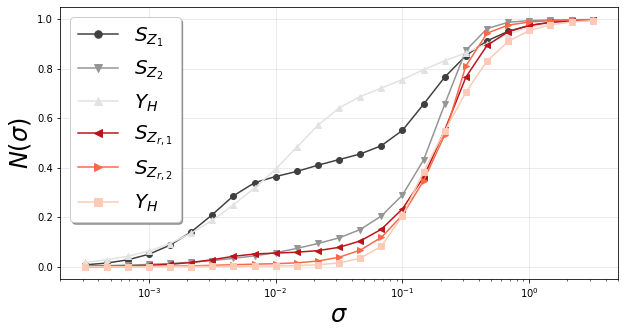

In [11]:
# Plot the comparison of normalized variance quantities:
plt = analysis.plot_normalized_variance_comparison((variance_data_initial, variance_data_biased), ([], []), ('Greys', 'Reds'), save_filename=None)

***

## References

The data set used in this notebook has been generated from a steady laminar flamelet model using Spitfire software [1] and a chemical mechanism by Hawkes et al. [2]. The data set can be found in `docs/tutorials` directory.

> [1] [M. A. Hansen - *Spitfire*, 2020](https://github.com/sandialabs/Spitfire)
> 
> [2] E. R. Hawkes, R. Sankaran, J. C. Sutherland, J. H. Chen - *Scalar mixing in direct numerical simulations of temporally evolving plane jet flames with skeletal co/h2 kinetics*, Proceedings of the combustion institute 31 (1) (2007) 1633–1640